In [45]:
from astropy import units as u

from poliastro.twobody import states as st
from poliastro.bodies import Earth, Mars, Sun
from poliastro.frames import Planes
from poliastro.twobody import propagation,Orbit

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt


import CtllDes 
from CtllDes.core import ctll, satellite



2 satellites in Walker Delta Pattern T/P/F = 2/1/0

id : ee4889f2-8905-44b2-a351-c0ad13301292	[a ecc inc raan argp nu] : [7977.2 km 0.3 95.0 deg 0.0 deg 0.0 rad 0.0 deg]		status : Online
id : 55b099a8-1ccc-4294-80d7-710ab1badb20	[a ecc inc raan argp nu] : [7977.2 km 0.3 95.0 deg 0.0 deg 0.0 rad 180.0 deg]		status : Online


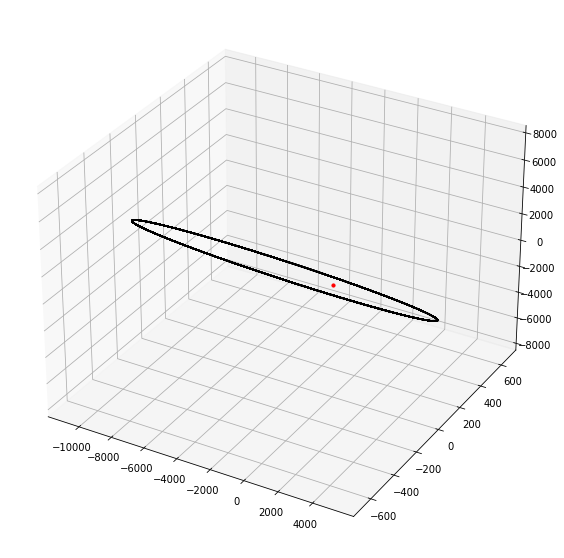

In [2]:
p = 7000 * u.km
ecc = 0.35 * u.one 
inc = 95 * u.deg
raan = 0 * u.rad
argp = 0 * u.rad
nu = 0 * u.rad
plane = Planes.EARTH_EQUATOR 

T = 2
P = 1
F = 0


constellation = ctll.Ctll.from_WalkerDelta(T,P,F,p,ecc,inc,argp)
constellation.info(v=True)

rv = constellation.rv(1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(0,0,0,zdir='z',s=10,c='r')
for rrvv in rv:
    ax.plot(rrvv[0][::100,0],rrvv[0][::100,1],rrvv[0][::100,2],zdir='z',c='k')



In [3]:
from CtllDes.targets.targets import Targets,Target
%matplotlib inline

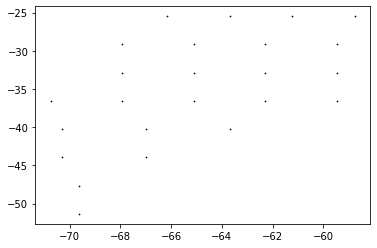

In [4]:
tgts = Targets.from_country('Argentina',N=10)
fig = tgts.plot()
plt.show()

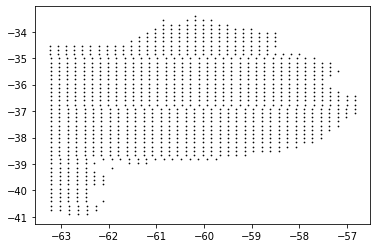

In [5]:
tgts = Targets.from_state('Buenos Aires')
fig = tgts.plot()
plt.show()

In [6]:
lonlats = constellation.ssps(2)


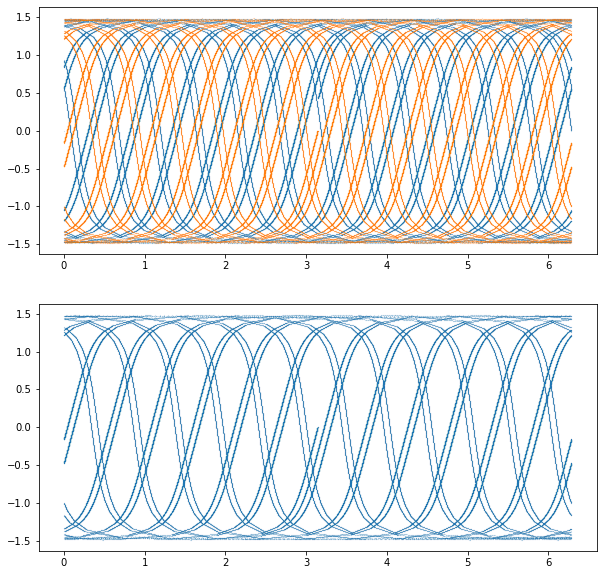

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for lonlat in lonlats:
    ax.scatter(lonlat[0],lonlat[1], s=0.005)
ax2.scatter(lonlat[0],lonlat[1],s=0.005)

In [8]:
from CtllDes.requests.coverage import Coverages
from CtllDes.core import instrument

cam = instrument.Camera(0,0)
constellation = ctll.Ctll.from_WalkerDelta(T,P,F,p,ecc,inc,argp,instrumentss=cam)

tgts = Targets.from_country('Argentina',N=6)

covs = Coverages.from_ctll(constellation,tgts,5)

df = covs.to_df()

/home/vancii/Documents/Instituto Balseiro/6to semestre/pi/CtllDes/venv/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in arcsin
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


target -66.99167366666659° -41.74321279999997°. 1 of 6
target -66.99167366666659° -35.08898219999997°. 2 of 6
target -60.399729333333276° -35.08898219999997°. 3 of 6
target -68.63965974999991° -28.434751599999966°. 4 of 6
target -63.69570149999993° -28.434751599999966°. 5 of 6
target -58.75174324999995° -28.434751599999966°. 6 of 6
target -66.99167366666659° -41.74321279999997°. 1 of 6
target -66.99167366666659° -35.08898219999997°. 2 of 6
target -60.399729333333276° -35.08898219999997°. 3 of 6
target -68.63965974999991° -28.434751599999966°. 4 of 6
target -63.69570149999993° -28.434751599999966°. 5 of 6
target -58.75174324999995° -28.434751599999966°. 6 of 6


In [9]:
df

,T,dt,Instrument ID,Target,accumulated,mean gap light,mean gap dark,response time,time gap,average time gap,max gap
0,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-66.99167366666659, -41.74321279999997)",1933.0,483.25,86013.400000,49721.817187,NaN,99442.707546,146583.0
1,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-66.99167366666659, -35.08898219999997)",2407.0,601.75,85918.600000,49553.307315,NaN,99105.689275,146277.0
2,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-60.399729333333276, -35.08898219999997)",2052.0,513.00,85989.600000,56113.459259,NaN,112225.992377,176756.0
3,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-68.63965974999991, -28.434751599999966)",3286.0,657.20,71452.333333,37303.410713,NaN,74605.898563,84497.0
4,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-63.69570149999993, -28.434751599999966)",2659.0,664.75,85868.200000,49439.013715,NaN,98877.103051,146053.0
5,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-58.75174324999995, -28.434751599999966)",2381.0,595.25,85923.800000,56012.875560,NaN,112024.826144,176664.0
6,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-66.99167366666659, -41.74321279999997)",1697.0,424.25,86060.600000,56657.952250,NaN,113314.969410,176880.0
7,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-66.99167366666659, -35.08898219999997)",2047.0,511.75,85990.600000,56554.814162,NaN,113108.694294,176745.0
8,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-60.399729333333276, -35.08898219999997)",2528.0,505.60,71578.666667,36959.223998,NaN,73917.531525,84822.0
9,5,1.0,99908728-8a3a-4429-84e9-427a6c889f8c,"(-68.63965974999991, -28.434751599999966)",2295.0,573.75,85941.000000,56484.881817,NaN,112968.830410,176674.0


In [36]:
ac = df.loc[(df['accumulated'] < 2000) & (df['accumulated'] > 1700)]
ac.values



array([[5, 1.0, UUID('99908728-8a3a-4429-84e9-427a6c889f8c'),
        (-66.99167366666659, -41.74321279999997), 1933.0, 483.25,
        86013.4, 49721.8171875, nan, 99442.7075462963, 146583.0]],
      dtype=object)

In [48]:
tgt_latlons = pd.DataFrame(df['Target'].apply(pd.Series))
tgt_lon = tgt_latlons[0]
tgt_lat = tgt_latlos[1]


0    -66.991674
1    -66.991674
2    -60.399729
3    -68.639660
4    -63.695701
5    -58.751743
6    -66.991674
7    -66.991674
8    -60.399729
9    -68.639660
10   -63.695701
11   -58.751743
Name: 0, dtype: float64